# Aufgaben Kapitel 6
## Aufgabe 6.1  

Untersuchen Sie die CSV-Datei iris-semicolon.csv aus dem Listing-Verzeichnis zu diesem Kapitel und importieren Sie diese.


In [1]:
# Schreiben Sie hier Ihren Programmcode
import pandas as pd
df_csv = pd.read_csv("iris-semicolon.csv", sep=';')
df_csv.info()
df_csv.describe()
df_csv.isna().sum()
df_csv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Petal length    150 non-null    float64
 1   Petal width     150 non-null    float64
 2   Sepal length    150 non-null    float64
 3   Sepal width     150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,Petal length,Petal width,Sepal length,Sepal width,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Aufgabe 6.2  
Untersuchen Sie die XML-Datei iris-mixed.xml aus dem Listing-Verzeichnis und importieren Sie diese.

In [ ]:
import xml.etree.ElementTree as ET
# Im DPA-Buch Kapitel 6.1.3 ab Seite 305
# from xml.etree import ElementTree

# df_xml = pd.read_xml("iris-mixed.xml", encoding='utf-8', parser='etree', xpath=".//iris")

tree = ET.parse("iris-mixed.xml")
root = tree.getroot()

data = []
for iris in root.findall("iris"):
    iris_type = iris.get("type")
    sepal = iris.find("sepal")
    petal = iris.find("petal")
    data.append({
        "type": iris_type,
        "sepal_length": float(sepal.get("length")),
        "sepal_width": float(sepal.get("width")),
        "petal_length": float(petal.get("length")),
        "petal_width": float(petal.get("width"))
    })

df_xml = pd.DataFrame(data)

df_xml.info()
df_xml.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          150 non-null    object 
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,type,sepal_length,sepal_width,petal_length,petal_width
0,Iris-setosa,5.1,3.5,1.4,1.4
1,Iris-setosa,4.9,3.0,1.4,1.4
2,Iris-setosa,4.7,3.2,1.3,1.3
3,Iris-setosa,4.6,3.1,1.5,1.5
4,Iris-setosa,5.0,3.6,1.4,1.4


## Aufgabe 6.3
Laden Sie die Datei sample.txt aus dem Listing-Verzeichnis, zerlegen Sie sie in einzelne Zeilen, und erstellen Sie aus diesen verschiedene Bag-of-Words- und N-Gramm-Modelle.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

with open("sample_OK.txt", "r+",encoding='utf-8') as file:
            lines = file.readlines()
df_text = [line.strip() for line in lines]

#Bag of Words
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(df_text)
print("\nBag of Words:")
# bag_of_words
print(bag_of_words)

#Bag of Words ohne stop words
stop = ["mit", "für", "wird","ab","an", "um","zu"]
vectorizer2 = CountVectorizer(stop_words = stop)
bag_of_words2 = vectorizer2.fit_transform(df_text)
print("\nBag of Words without stop words:")
bag_of_words2
# print(f"\nMatrix OHNE stop words:\n{bag_of_words2.toarray()}")




Bag of Words:
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 143 stored elements and shape (9, 111)>
  Coords	Values
  (0, 96)	1
  (0, 24)	1
  (0, 21)	1
  (0, 25)	1
  (0, 98)	1
  (0, 22)	1
  (0, 89)	1
  (0, 63)	1
  (0, 60)	1
  (0, 2)	1
  (0, 93)	1
  (0, 100)	1
  (0, 77)	1
  (0, 84)	1
  (1, 89)	1
  (1, 100)	1
  (1, 13)	1
  (1, 85)	1
  (1, 9)	1
  (1, 49)	2
  (1, 95)	1
  (1, 56)	1
  (1, 31)	1
  (1, 46)	1
  (1, 72)	1
  :	:
  (7, 25)	1
  (7, 89)	1
  (7, 100)	1
  (7, 49)	1
  (7, 109)	1
  (7, 105)	1
  (7, 83)	1
  (7, 3)	1
  (7, 20)	1
  (7, 18)	1
  (7, 91)	1
  (7, 82)	1
  (7, 34)	1
  (7, 108)	1
  (7, 5)	1
  (7, 101)	1
  (7, 44)	1
  (7, 52)	1
  (7, 28)	1
  (7, 6)	1
  (7, 38)	1
  (7, 48)	1
  (7, 53)	1
  (7, 104)	1
  (7, 36)	1

Bag of Words without stop words:


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 133 stored elements and shape (9, 104)>

In [5]:
#N-gramme
vectorizer3 = CountVectorizer(ngram_range = (2, 2)) # Bigramme 
# vectorizer3 = CountVectorizer(ngram_range = (4, 4)) # 4-Gramme 
ngramme = vectorizer3.fit_transform(df_text)
print(vectorizer3.get_feature_names_out())
ngramme
# # print("\nMatrix der N-gramme:")
# # print(bigramme.toarray())


['ab ob' 'algebra und' 'algorithmen verarbeitet' 'alle drei' 'alle zu'
 'anschließend wird' 'array erzeugt' 'auf linearer' 'aus einem'
 'automatisch in' 'automatische erzeugung' 'bag of' 'basiert und'
 'beispielsweise werden' 'bereits möglich' 'betrachten bietet'
 'bietet sich' 'da machine' 'dafür werden' 'daher eigentlich' 'das die'
 'das format' 'daten die' 'daten sinnvoll' 'datenanalyse und'
 'den folgenden' 'der daten' 'der einzelnen' 'die automatische'
 'die daten' 'die einzelnen' 'die existierenden' 'die häufigkeit'
 'die von' 'die wörter' 'drei verfahren' 'eigentlich nur' 'ein array'
 'einem text' 'eines textes' 'eingeordnet gekürzt' 'eingesetzt werden'
 'einsatzzweck ab' 'einzelne wörter' 'einzelnen wörter'
 'einzelnen zeichen' 'erwünschte mails' 'erzeugt das' 'erzeugung neuer'
 'es hängt' 'existierenden vorbildern' 'folgenden unterabschnitten'
 'format bag' 'für jeden' 'geeignete verfahren' 'gekürzt oder' 'hängt vom'
 'häufigkeit jedes' 'in den' 'in einzelne' 'in erwünschte'
 

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 139 stored elements and shape (9, 136)>

In [4]:
#N-gramme without stop words
vectorizer4 = CountVectorizer(ngram_range=(2, 2), stop_words=stop)  # Bigramme
# vectorizer4 = CountVectorizer(ngram_range=(4, 4), stop_words=stop)  # 4-gramme
ngramme_ohne = vectorizer4.fit_transform(df_text)
print(vectorizer4.get_feature_names_out())
ngramme_ohne

['algebra und' 'algorithmen verarbeitet' 'alle drei' 'alle untersuchenden'
 'anschließend jeden' 'array erzeugt' 'auf linearer' 'aus einem'
 'automatisch in' 'automatische erzeugung' 'bag of' 'basiert und'
 'beispielsweise werden' 'bereits möglich' 'betrachten bietet'
 'bietet sich' 'da machine' 'dafür werden' 'daher eigentlich' 'das die'
 'das format' 'daten die' 'daten sinnvoll' 'datenanalyse und'
 'den folgenden' 'der daten' 'der einzelnen' 'die automatische'
 'die daten' 'die einzelnen' 'die existierenden' 'die häufigkeit'
 'die von' 'die wörter' 'drei verfahren' 'eigentlich nur' 'ein array'
 'einem text' 'eines textes' 'eingeordnet gekürzt' 'eingesetzt werden'
 'einsatzzweck ob' 'einzelne wörter' 'einzelnen wörter'
 'einzelnen zeichen' 'erwünschte mails' 'erzeugt das' 'erzeugung neuer'
 'es hängt' 'existierenden vorbildern' 'folgenden unterabschnitten'
 'format bag' 'geeignete verfahren' 'gekürzt oder' 'hängt vom'
 'häufigkeit jedes' 'in den' 'in einzelne' 'in erwünschte'
 'in ver

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 129 stored elements and shape (9, 126)>

## Aufgabe 6.4
Überführen Sie die Wohnungsdaten aus der Datei size-rent.csv in eine SQLite3-Datenbanktabelle. Führen Sie Auswahlabfragen durch, um die höchste Miete, die niedrigste Miete, die Durchschnittsmiete und die Anzahl der Wohnungen zu ermitteln, jeweils pro Zimmeranzahl und insgesamt.

In [6]:
import sqlite3

#CSV to DB

#connect to DB (new DB)
db = sqlite3.connect('size-rent.db')

#create table
db.execute("""
CREATE TABLE IF NOT EXISTS rent_data (
           Size SMALLINT,
           Rooms SMALLINT,
           Price SMALLINT
           )
""")

#Datei lesen
file_data = pd.read_csv('size-rent.csv')
#to DB laden
file_data.to_sql("rent_data", db, if_exists="append", index=False)

print(db.execute("PRAGMA table_info(rent_data)").fetchall())



[(0, 'Size', 'SMALLINT', 0, None, 0), (1, 'Rooms', 'SMALLINT', 0, None, 0), (2, 'Price', 'SMALLINT', 0, None, 0)]


In [17]:
#SQL Anfrage
max_price = db.execute("SELECT MAX(Price) FROM rent_data").fetchall()
min_price = db.execute("SELECT MIN(Price) FROM rent_data").fetchall()
mean_price = db.execute("SELECT AVG(Price) FROM rent_data").fetchall()
print(f"Max Price = {max_price[0][0]}\nMin Price = {min_price[0][0]}\n Mean Price = {mean_price[0][0]:.2f}")


Max Price = 3950
Min Price = 290
 Mean Price = 994.52


In [ ]:
#SQL Anfrage
wohnungen = db.execute("SELECT COUNT(Rooms) FROM rent_data").fetchall()
wohn_pro_zim = db.execute("""
                          SELECT Rooms, COUNT(*) 
                          FROM rent_data
                          GROUP BY Rooms
                          """).fetchall()
print(f"Anzahl der Wohnungen = {wohnungen[0][0]}\n")
print(f"Anzahl der Wohnungen pro Zimmeranzahl: {wohn_pro_zim}\n")

Anzahl der Wohnungen = 340

Anzahl der Wohnungen pro Zimmeranzahl: [(1, 76), (2, 104), (3, 116), (4, 34), (5, 10)]



## Aufgabe 6.5
Schreiben Sie eine Funktion, die ein Graustufenbild und einen Integerwert als Argumente entgegennimmt. Zunächst soll sie die Dimensionen des Bild-Arrays überprüfen und herausfinden, ob es Hoch- oder Querformat hat. Je nachdem soll sie oben
und unten beziehungsweise rechts und links so viel wegschneiden, dass sich ein quadratisches Bild ergibt. Anschließend soll dieses Bild auf die durch den Integerwert angegebene Höhe und Breite herunterskaliert werden, und das umgerechnete Ergebnis soll zurückgegeben werden.  
Probieren Sie die fertige Funktion mit verschiedenen Bildern aus.

(750, 1000)
Es ist Querformat


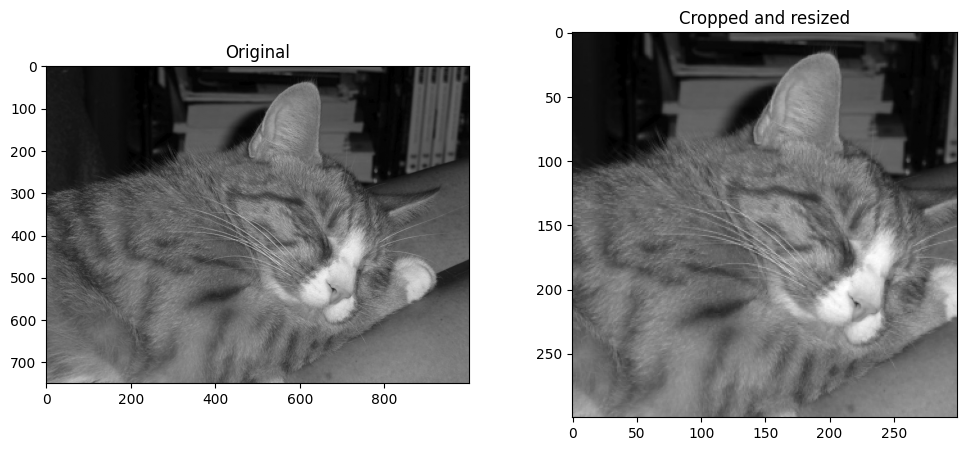

In [ ]:
from skimage import io, color
from skimage.transform import resize
import matplotlib.pyplot as plt

#funktion
def quadrat(bild,wish_size):
    size = bild.shape
    # size = (Höhe,Breite)
    # height,width=bild.shape[:2]    #elegant
    print(size)
    if size[0]>size[1]:
        print("Es ist Hochformat")
        zu_schneiden = (size[0]-size[1])//2  #muss Ganzzahl sein
        bild = bild[zu_schneiden:(size[0]-zu_schneiden), :]
    elif size[0]<size[1]:
        print("Es ist Querformat")
        zu_schneiden = (size[1]-size[0])//2  #muss Ganzzahl sein
        bild = bild[ : , zu_schneiden : (size[1]-zu_schneiden) ]
    else: 
        print("Bild ist schon quadratisch")
        #nix zu schneiden
    #resize image
    passende_bild = resize(bild, (wish_size,wish_size))
    return passende_bild

#image download
img = io.imread("katze.jpg")
#image to grayscale
if img.ndim == 3:
    img = color.rgb2gray(img)
new_img = quadrat(img,300)

#show image
fig, ax  = plt.subplots(1,2, figsize=(12,5))    #subplots

ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original")

ax[1].imshow(new_img, cmap="gray")
ax[1].set_title("Cropped and resized")

plt.show()


